In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
import pingouin as pg
import reliability_stability
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\raft_data_5-nodes_2-fails.csv", error_bad_lines=False, sep=",")
paxos = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\paxos_data_5-nodes_2-fails.csv", error_bad_lines=False, sep=",")
noAlg = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\control\\outdoor_control_5-nodes_2-fails\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 2053: expected 8 fields, saw 9\nSkipping line 2095: expected 8 fields, saw 9\nSkipping line 2400: expected 8 fields, saw 10\nSkipping line 2403: expected 8 fields, saw 9\nSkipping line 2796: expected 8 fields, saw 9\n'
b'Skipping line 375: expected 8 fields, saw 9\nSkipping line 952: expected 8 fields, saw 9\nSkipping line 2691: expected 8 fields, saw 9\n'
b'Skipping line 7: expected 8 fields, saw 9\nSkipping line 48: expected 8 fields, saw 9\nSkipping line 424: expected 8 fields, saw 9\n'


In [4]:
raft.shape

(3693, 8)

In [5]:
paxos.shape

(3491, 8)

In [6]:
noAlg.shape

(2132, 8)

In [7]:
raft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      3691 non-null   object 
 1   packetNumber  3693 non-null   object 
 2   temperature   3693 non-null   object 
 3   brightness    3675 non-null   object 
 4   humidity      3662 non-null   object 
 5   onBoardTemp   3650 non-null   object 
 6   sent          3629 non-null   object 
 7   received      3492 non-null   float64
dtypes: float64(1), object(7)
memory usage: 230.9+ KB


In [8]:
paxos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      3488 non-null   object 
 1   packetNumber  3490 non-null   object 
 2   temperature   3483 non-null   object 
 3   brightness    3464 non-null   object 
 4   humidity      3448 non-null   object 
 5   onBoardTemp   3424 non-null   object 
 6   sent          3376 non-null   object 
 7   received      3204 non-null   float64
dtypes: float64(1), object(7)
memory usage: 218.3+ KB


In [9]:
noAlg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2131 non-null   object 
 1   packetNumber  2132 non-null   object 
 2   temperature   2111 non-null   object 
 3   brightness    2087 non-null   object 
 4   humidity      2054 non-null   object 
 5   onBoardTemp   2032 non-null   object 
 6   sent          2002 non-null   object 
 7   received      1975 non-null   float64
dtypes: float64(1), object(7)
memory usage: 133.4+ KB


In [10]:
raft[raft.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,5,1,20,489,41,23,706443508403,7.064435e+11
1,1,4,20,400,41,23,706443512039,7.064435e+11
2,2,2,18,636,39,23,706443513660,7.064435e+11
3,3,2,19,323,46,22,706443516160,7.064435e+11
4,5,2,20,512,41,23,706443518921,7.064435e+11
...,...,...,...,...,...,...,...,...
3688,4,996,22,430,34,26,706454018016,7.064540e+11
3689,4,997,23,428,34,26,706454019524,7.064540e+11
3690,4,998,NaN,506,34,26,706454021032,7.064540e+11
3691,4,999,20,542,34,26,706454022540,7.064540e+11


In [11]:
paxos[paxos.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,2,1,21,1383,40,23,706454251265,7.064543e+11
1,NaN,706454252225,706454253670,NaN,NaN,NaN,NaN,NaN
2,4,1,21,462,33,25,706454254940,7.064543e+11
3,5,1,23,1061,36,25,706454256261,7.064543e+11
4,1,3,20,1094,41,23,706454261212,7.064543e+11
...,...,...,...,...,...,...,...,...
3486,5,998,22,325,36,25,706464742029,7.064647e+11
3487,3,993,21,179,43,24,706464750007,7.064648e+11
3488,5,999,23,204,36,25,706464752547,7.064648e+11
3489,3,994,21,179,43,24,706464760524,7.064648e+11


In [12]:
noAlg[noAlg.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,4,1,21,187,46,21,706614420676,7.066144e+11
1,NaN,NaN,706614422857,NaN,NaN,NaN,NaN,NaN
2,NaN,706614423865,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,21,31145,21,706614423699,706614424752,NaN
4,4,5,20,71,46,21,706614424706,7.066144e+11
...,...,...,...,...,...,...,...,...
2127,5,996,21,668,35,25,706616418002,7.066164e+11
2128,5,997,21,534,35,25,706616420010,7.066164e+11
2129,5,998,22,531,35,25,706616422019,7.066164e+11
2130,5,999,21,668,35,25,706616424027,7.066164e+11


In [13]:
raft_dropna=raft.dropna()

In [14]:
raft_dropna.shape

(3490, 8)

In [15]:
paxos_dropna=paxos.dropna()

In [16]:
paxos_dropna.shape

(3200, 8)

In [17]:
noAlg_dropna=noAlg.dropna()

In [18]:
noAlg_dropna.shape

(1974, 8)

In [19]:
raft_timings = raft_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [20]:
paxos_timings = paxos_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [21]:
noAlg_timings = noAlg_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [22]:
raft_timings_coerce = raft_timings.apply(pd.to_numeric, errors = 'coerce')

In [23]:
paxos_timings_coerce= paxos_timings.apply(pd.to_numeric, errors = 'coerce')

In [24]:
noAlg_timings_coerce= noAlg_timings.apply(pd.to_numeric, errors = 'coerce')

In [25]:
raft_timings_coerce_dropna=raft_timings_coerce.dropna()

In [26]:
paxos_timings_coerce_dropna=paxos_timings_coerce.dropna()

In [27]:
noAlg_timings_coerce_dropna=noAlg_timings_coerce.dropna()

In [28]:
raft_timings_coerce_dropna.shape

(3394, 2)

In [29]:
paxos_timings_coerce_dropna.shape

(3109, 2)

In [30]:
noAlg_timings_coerce_dropna.shape

(1922, 2)

In [31]:
raft_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3394 entries, 0 to 3692
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      3394 non-null   float64
 1   received  3394 non-null   float64
dtypes: float64(2)
memory usage: 79.5 KB


In [32]:
paxos_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3490
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      3109 non-null   float64
 1   received  3109 non-null   float64
dtypes: float64(2)
memory usage: 72.9 KB


In [33]:
noAlg_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 0 to 2131
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      1922 non-null   float64
 1   received  1922 non-null   float64
dtypes: float64(2)
memory usage: 45.0 KB


In [34]:
raft_timings_redone = {'sent': [],'received':[]}

raft_result_redone = pd.DataFrame(raft_timings_redone)

In [35]:
paxos_timings_redone = {'sent': [],'received':[]}

paxos_result_redone = pd.DataFrame(paxos_timings_redone)

In [36]:
noAlg_timings_redone = {'sent': [],'received':[]}

noAlg_result_redone = pd.DataFrame(noAlg_timings_redone)

In [37]:
for index, row in raft_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > raft_timings_coerce_dropna['sent'].iloc[0]):
            
            raft_result_redone.at[index, 'sent'] = int(row['sent'])
            raft_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [38]:
for index, row in paxos_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > paxos_timings_coerce_dropna['sent'].iloc[0]):
            
            paxos_result_redone.at[index, 'sent'] = int(row['sent'])
            paxos_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [39]:
for index, row in noAlg_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > noAlg_timings_coerce_dropna['sent'].iloc[0]):
            
            noAlg_result_redone.at[index, 'sent'] = int(row['sent'])
            noAlg_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [40]:
raft_result_redone.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 1 to 3692
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      1412 non-null   float64
 1   received  1412 non-null   float64
dtypes: float64(2)
memory usage: 73.1 KB


In [41]:
paxos_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 2 to 3490
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      3096 non-null   float64
 1   received  3096 non-null   float64
dtypes: float64(2)
memory usage: 152.6 KB


In [42]:
noAlg_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 4 to 2131
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      1909 non-null   float64
 1   received  1909 non-null   float64
dtypes: float64(2)
memory usage: 124.7 KB


In [43]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=raft_result_redone)

(0.9999999995264384, array([1., 1.]))

In [44]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=paxos_result_redone)

(0.9999999845784877, array([1., 1.]))

In [45]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=noAlg_result_redone)

(0.999999909088741, array([1., 1.]))

In [46]:
raft_latency_pd = {'latency': []}

raft_latency = pd.DataFrame(raft_latency_pd)

In [47]:
paxos_latency_pd = {'latency': []}

paxos_latency = pd.DataFrame(paxos_latency_pd)

In [48]:
noAlg_latency_pd = {'latency': []}

noAlg_latency = pd.DataFrame(noAlg_latency_pd)

In [49]:
for index, row in raft_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        raft_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [50]:
for index, row in paxos_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        paxos_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [51]:
for index, row in noAlg_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        noAlg_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [52]:
raft_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 1 to 3692
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  1412 non-null   float64
dtypes: float64(1)
memory usage: 62.1 KB


In [53]:
raft_latency.shape

(1412, 1)

In [54]:
paxos_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 2 to 3490
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  3096 non-null   float64
dtypes: float64(1)
memory usage: 128.4 KB


In [55]:
paxos_latency.shape

(3096, 1)

In [56]:
noAlg_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 4 to 2131
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  1909 non-null   float64
dtypes: float64(1)
memory usage: 109.8 KB


In [57]:
noAlg_latency.shape

(1909, 1)

In [58]:
raft_latency['latency'].mean()

433.0545325779037

In [59]:
paxos_latency['latency'].mean()

1093.6734496124031

In [60]:
noAlg_latency['latency'].mean()

653.6856993190152

In [61]:
pwd

'C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook'

In [69]:
latency_5_2 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_5_2.csv", error_bad_lines=False, sep=",")

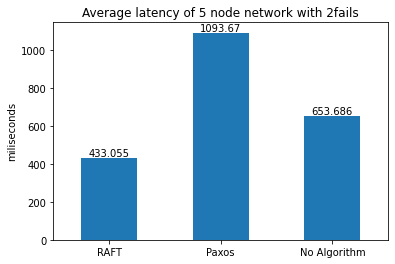

In [70]:
ax = latency_5_2.plot.bar(x='algorithm')
plt.title('Average latency of 5 node network with 2fails')
ax.set(xlabel='', ylabel='miliseconds')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
#plt.legend(loc='upper left')
ax.get_legend().remove()
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\latency_5_2_mean.png', bbox_inches='tight')